In [8]:
#importing required libraries
import pandas as pd                             # DataFrames for tabular data
import numpy as np                              # ndarrys for gridded data
import matplotlib.pyplot as plt                 # plotting
import seaborn as sns                           # generates enhanced plots

In [9]:
#reading a .csv file as a DataFrame (petroleumflowdat.csv)
oil = pd.read_csv('petroleumflowdata.csv')

In [10]:
#we using this command for a table preview
oil.head()

,Date,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow
0,22/05/2004,10.7415,0.00,0.00,0.000000,0.000000,0.0,10.7415
1,23/05/2004,34.3655,8.05,3.20,0.340755,0.135455,2242.0,23.6240
2,24/05/2004,58.6060,8.12,5.03,0.334977,0.207504,2283.0,24.2405
3,25/05/2004,83.7587,8.01,3.10,0.318455,0.123247,2323.0,25.1527
4,26/05/2004,108.0027,5.58,1.43,0.230160,0.058984,2328.5,24.2440


In [11]:
oil.tail()

,Date,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow
5302,27/11/2018,158168.3551,4.75,312.0,0.438990,28.834690,1560.5,10.8203
5303,28/11/2018,158178.8228,5.75,265.0,0.549309,25.315972,1590.0,10.4677
5304,29/11/2018,158189.6846,3.50,293.0,0.322230,26.975271,1592.5,10.8618
5305,30/11/2018,158200.4554,3.50,287.0,0.324953,26.646117,1594.0,10.7708
5306,NaN,158211.1964,4.00,288.0,0.372405,26.813146,1595.5,10.7410


In [12]:
type(oil)

pandas.core.frame.DataFrame

In [13]:
# information of oil
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5306 non-null   object 
 1   Cum. flow      5307 non-null   float64
 2   Condensate     5307 non-null   float64
 3   Water          5307 non-null   float64
 4   CGR            5307 non-null   float64
 5   WGR            5307 non-null   float64
 6   Avg. Pressure  5307 non-null   float64
 7   Total flow     5307 non-null   float64
dtypes: float64(7), object(1)
memory usage: 331.8+ KB


In [14]:
#checking the summary summary statistics.
oil.describe()

,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow
count,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000,5307.000000
mean,83937.163711,21.602225,50.172154,0.718086,2.701395,1906.785598,29.811795
std,47152.673681,18.560487,76.061487,0.588929,5.286858,222.967627,10.352953
min,10.741500,0.000000,0.000000,0.000000,0.000000,0.000000,4.506700
25%,47144.646100,9.500000,4.750000,0.385384,0.113129,1731.500000,21.595100
50%,79235.443400,18.000000,6.000000,0.570292,0.165248,1850.000000,31.034400
75%,127310.681700,26.000000,76.250000,0.744793,3.755925,2066.750000,38.229250
max,158211.196400,110.500000,495.000000,4.652305,40.082697,2595.000000,51.660900


In [15]:
# checking missing values
oil.isnull().sum()

Date             1
Cum. flow        0
Condensate       0
Water            0
CGR              0
WGR              0
Avg. Pressure    0
Total flow       0
dtype: int64

By checking the missing date we can see it corresponds to the last day in our time series record since it is just one data point and given it is the last in our record(hence does not have predictive value) we just drop it.

In [16]:
oil =  oil.dropna(axis = 0)

In [17]:
# converting the date column to date format
oil['Date'] = pd.to_datetime(oil['Date'],format='%d/%m/%Y')

In [18]:
oil = oil.set_index('Date')

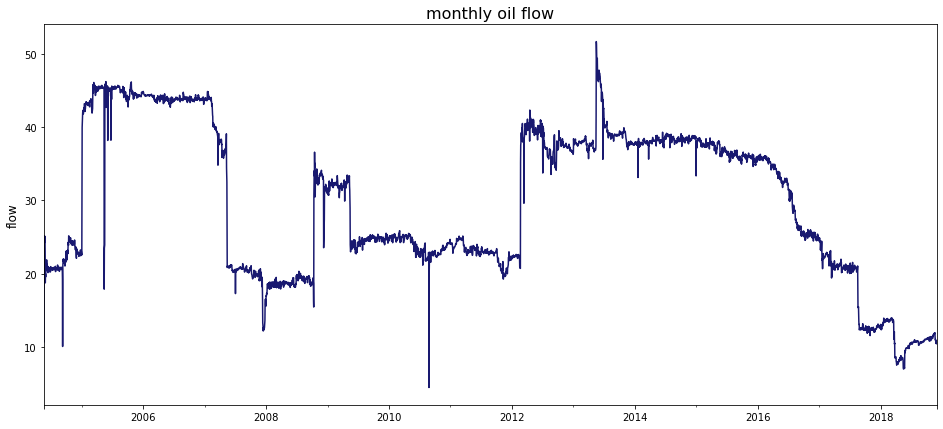

In [19]:
# here this plot shows the monthly oil flow from year 2006 to 2018.
oil['Total flow'].plot(lw=1.5, color='midnightblue', figsize=(16, 7))
plt.title('monthly oil flow', fontsize=16)
plt.xlabel('')
plt.ylabel('flow', fontsize=12);

In [20]:
# Indexing the Batches
train_df = oil.sort_values(by=['Date']).copy()

date_index = oil.index
date_index_df = pd.DataFrame(date_index)

# Adding Month and Year in separate columns
d = pd.to_datetime(train_df.index)
train_df['Day'] = d.strftime("%d")
train_df['Month'] = d.strftime("%m") 
train_df['Year'] = d.strftime("%Y") 

# We convert the date-index into a number-index
train_df = train_df.reset_index(level=0)
train_df

,Date,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow,Day,Month,Year
0,2004-05-22,10.7415,0.00,0.00,0.000000,0.000000,0.0,10.7415,22,05,2004
1,2004-05-23,34.3655,8.05,3.20,0.340755,0.135455,2242.0,23.6240,23,05,2004
2,2004-05-24,58.6060,8.12,5.03,0.334977,0.207504,2283.0,24.2405,24,05,2004
3,2004-05-25,83.7587,8.01,3.10,0.318455,0.123247,2323.0,25.1527,25,05,2004
4,2004-05-26,108.0027,5.58,1.43,0.230160,0.058984,2328.5,24.2440,26,05,2004
...,...,...,...,...,...,...,...,...,...,...,...
5301,2018-11-26,158157.5348,3.75,338.00,0.350543,31.595577,1556.0,10.6977,26,11,2018
5302,2018-11-27,158168.3551,4.75,312.00,0.438990,28.834690,1560.5,10.8203,27,11,2018
5303,2018-11-28,158178.8228,5.75,265.00,0.549309,25.315972,1590.0,10.4677,28,11,2018
5304,2018-11-29,158189.6846,3.50,293.00,0.322230,26.975271,1592.5,10.8618,29,11,2018


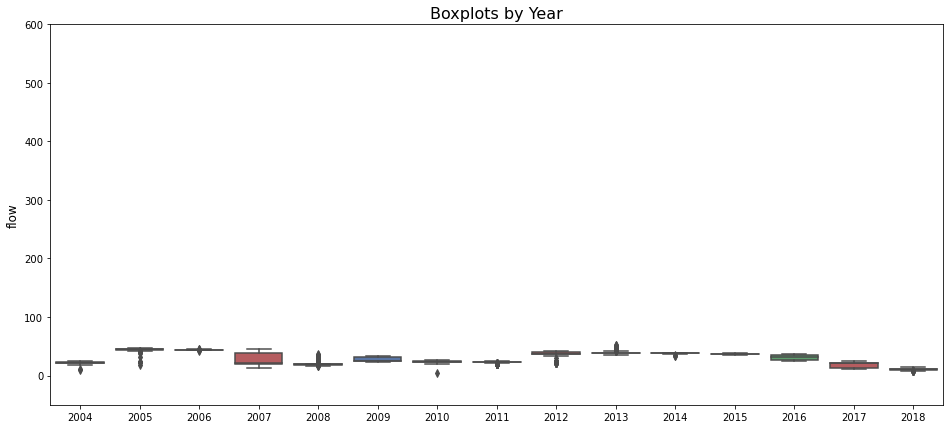

In [21]:
# box plots for oil flow from year 2004-2018
plt.figure(figsize=(16,7))

ax=sns.boxplot(x='Year', y='Total flow', data = train_df, orient='v', palette = sns.color_palette("deep", 5))
ax.set(ylim=(-50, 600))

plt.title('Boxplots by Year', fontsize=16)
plt.xlabel('')
plt.ylabel('flow', fontsize=12);

There is no particular differences in the distributions of the oil flow across the years apart from the period we identified as to corresponding to the financial crisis


In [22]:
train_df.columns

Index(['Date', 'Cum. flow', 'Condensate', 'Water', 'CGR', 'WGR',
       'Avg. Pressure', 'Total flow', 'Day', 'Month', 'Year'],
      dtype='object')

In time-series data, the relationship between input variables used
in the model (independent variable) and the predicted value (output variable) changes
over time, as the time-series data have usually trends or seasonal pattern. The proper
selection of the time-lag value becomes important to find the section of data where values of
independent variables are highly correlated. This would generate more precise results with
higher forecasting accuracy.

In [23]:
import pandas.testing as tm

In [24]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def autocorr_plots(y, lags=20, alpha=0.05):
    """
    This Function is to plot autocorrelations and partial autocorrelations

    y: Time series data
    lags: Number of lags to plot
    alpha: Confidence level for random noise
    
    """
    se = stats.norm().ppf(1-alpha/2)/np.sqrt(len(y))
    
    fig, ax = plt.subplots(ncols=2, figsize=(18, 6), sharey=True)
    
    plot_acf(y, lags=lags, alpha=alpha, ax=ax[0], color='indigo')
    ax[0].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)
    ax[0].set_title('Autocorrelation', fontsize=16)
    
    plot_pacf(y, lags=lags, alpha=alpha, ax=ax[1], method='ywmle', color='indigo')
    ax[1].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)
    ax[1].set_title('Partial Autocorrelation', fontsize=16)
    
    return fig, ax

def adf_statistics(series):
    """
    This Function is to give output Augmented Dickey-Fuller test for stationarity
    
    series: Time series of interest
    
    """
    result = adfuller(series.values)
    
    print('ADF Statistic: %.4f' % result[0])
    print('p-value: %.4f' % result[1])
    
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.4f' % (key, value))
    if result[1] < 0.0500:
        print("Null hypothesis of non-stationarity is rejected")
    else:
        print("Null hypothesis of non-stationarity is NOT rejected")

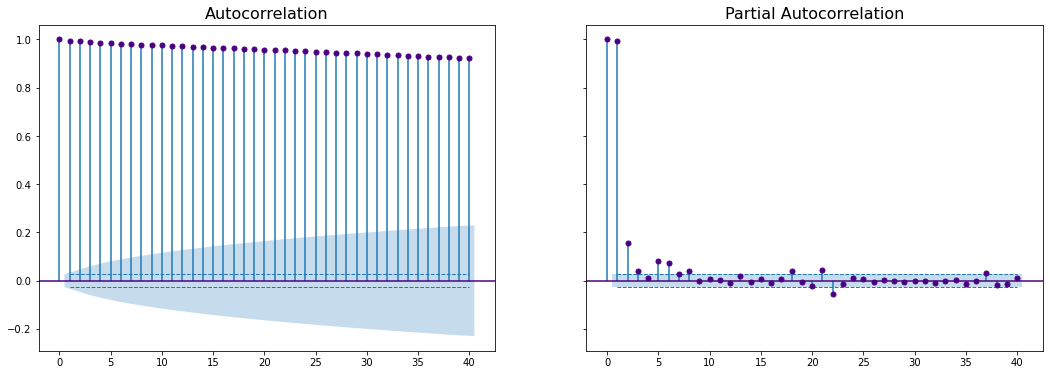

In [25]:
fig, ax = autocorr_plots(train_df['Total flow'], lags= 40)

We observe that the target series is highly non stationary, and the ACF decays very slowly. 

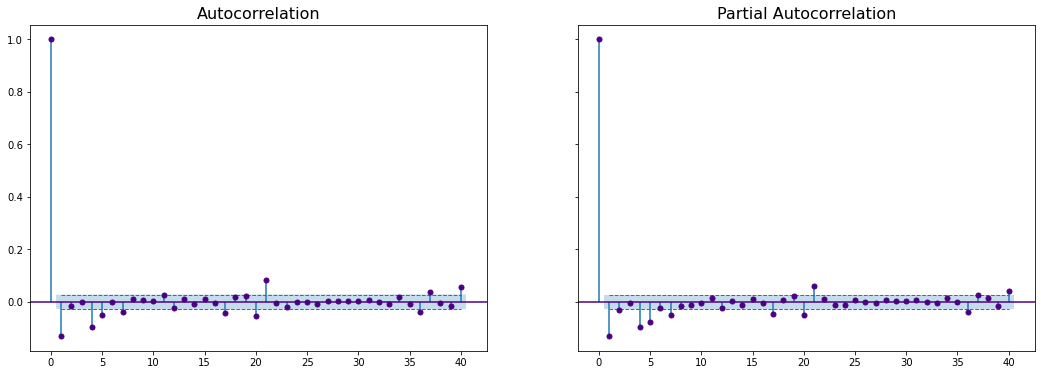

In [26]:
fig, ax = autocorr_plots(train_df['Total flow'].diff()[1:], lags= 40)

In [27]:
import warnings

In [28]:
# Generating the target variable
train_df['target'] = train_df['Total flow'].shift(-1)
train_df = train_df.dropna(axis = 0)
train_df

,Date,Cum. flow,Condensate,Water,CGR,WGR,Avg. Pressure,Total flow,Day,Month,Year,target
0,2004-05-22,10.7415,0.00,0.00,0.000000,0.000000,0.0,10.7415,22,05,2004,23.6240
1,2004-05-23,34.3655,8.05,3.20,0.340755,0.135455,2242.0,23.6240,23,05,2004,24.2405
2,2004-05-24,58.6060,8.12,5.03,0.334977,0.207504,2283.0,24.2405,24,05,2004,25.1527
3,2004-05-25,83.7587,8.01,3.10,0.318455,0.123247,2323.0,25.1527,25,05,2004,24.2440
4,2004-05-26,108.0027,5.58,1.43,0.230160,0.058984,2328.5,24.2440,26,05,2004,25.1299
...,...,...,...,...,...,...,...,...,...,...,...,...
5300,2018-11-25,158146.8371,3.75,310.00,0.356521,29.472443,1556.0,10.5183,25,11,2018,10.6977
5301,2018-11-26,158157.5348,3.75,338.00,0.350543,31.595577,1556.0,10.6977,26,11,2018,10.8203
5302,2018-11-27,158168.3551,4.75,312.00,0.438990,28.834690,1560.5,10.8203,27,11,2018,10.4677
5303,2018-11-28,158178.8228,5.75,265.00,0.549309,25.315972,1590.0,10.4677,28,11,2018,10.8618


In [29]:
#showing type of train_df
type(train_df)

pandas.core.frame.DataFrame

In [30]:
# checking missing values
train_df.isnull().sum()

Date             0
Cum. flow        0
Condensate       0
Water            0
CGR              0
WGR              0
Avg. Pressure    0
Total flow       0
Day              0
Month            0
Year             0
target           0
dtype: int64

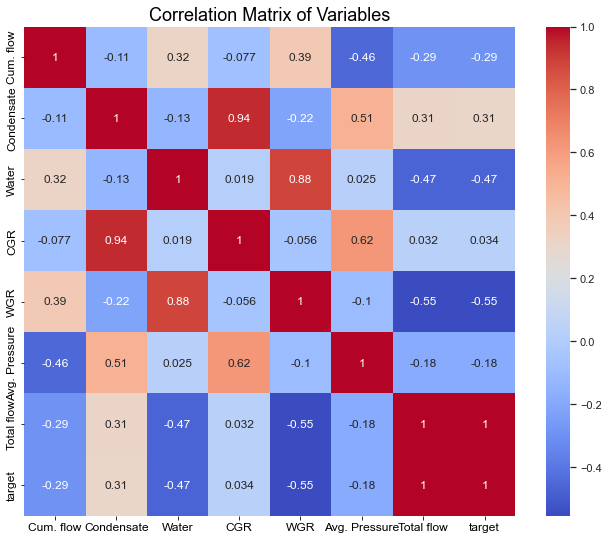

In [31]:
# Generating correlation matrix for the continuous variables
fig, ax = plt.subplots(figsize=(11, 9))

sns.set(font_scale=1.0)
sns.heatmap(train_df[['Cum. flow', 'Condensate', 'Water', 'CGR', 'WGR', 'Avg. Pressure', 'Total flow', 'target']].corr(), 
            annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix of Variables", fontsize=18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=12)
plt.show()

There are generally weak correlations between the continuous explanatory variables with the "target" or "Total flow" variable one-period ahead. Also there are high correlations between "water", "WGR" and "condensate", "CGR" and "average pressure", "CGR". This will not typically be a problem for machine learning models, but still would prefer a more parsimonious model.

Therefore, Here we are deleting the "CGR" and "WGR" variables.

In [32]:
# Dropping the unnecessary and redundant variables
train_df = train_df.drop(['CGR', 'WGR'], axis=1)

In [33]:
train_df.tail()

,Date,Cum. flow,Condensate,Water,Avg. Pressure,Total flow,Day,Month,Year,target
5300,2018-11-25,158146.8371,3.75,310.0,1556.0,10.5183,25,11,2018,10.6977
5301,2018-11-26,158157.5348,3.75,338.0,1556.0,10.6977,26,11,2018,10.8203
5302,2018-11-27,158168.3551,4.75,312.0,1560.5,10.8203,27,11,2018,10.4677
5303,2018-11-28,158178.8228,5.75,265.0,1590.0,10.4677,28,11,2018,10.8618
5304,2018-11-29,158189.6846,3.50,293.0,1592.5,10.8618,29,11,2018,10.7708


In [34]:
# information of train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5305 entries, 0 to 5304
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           5305 non-null   datetime64[ns]
 1   Cum. flow      5305 non-null   float64       
 2   Condensate     5305 non-null   float64       
 3   Water          5305 non-null   float64       
 4   Avg. Pressure  5305 non-null   float64       
 5   Total flow     5305 non-null   float64       
 6   Day            5305 non-null   object        
 7   Month          5305 non-null   object        
 8   Year           5305 non-null   object        
 9   target         5305 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 455.9+ KB


# Machine learning models

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [36]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
time_split_inner = TimeSeriesSplit(n_splits = 3)

def plot_model_results1(X, y,model,search_params, test_size=0.3, plot_intervals=False, plot_anomalies=False):
    """
    - Plot model vs original values.
    - Prediction interval is 95%
    
    """
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size)

# Here we are using random forest
    model1 = GridSearchCV (model, search_params, cv=time_split_inner, scoring = 'neg_mean_squared_error', 
                     n_jobs=-1, verbose=1)
    model1.fit(X_train, y_train)
    final_model = model1.best_estimator_
    prediction = final_model.predict(X_test)

    plt.figure(figsize=(15, 7))

    x = range(prediction.size)
    plt.plot(x, prediction, label='prediction', linewidth=2.0)
    plt.plot(x, y_test, label='actual', linewidth=2.0)
    if plot_intervals:
        timeseries_cv = TimeSeriesSplit(n_splits=5)
        cv = cross_val_score(model, X_train, y_train, 
                             cv=timeseries_cv, scoring='neg_mean_absolute_error')
        mae = -1 * cv.mean()
        deviation = cv.std()

        scale = 1.96
        margin_error = mae + scale * deviation
        lower = prediction - margin_error
        upper = prediction + margin_error

        fill_alpha = 0.2
        fill_color = '#66C2D7'
        plt.fill_between(x, lower, upper, color=fill_color, alpha=fill_alpha, label='95% CI')      

        if plot_anomalies:
            anomalies = np.array([np.nan] * len(y_test))
            anomalies[y_test < lower] = y_test[y_test < lower]
            anomalies[y_test > upper] = y_test[y_test > upper]
            plt.plot(anomalies, 'o', markersize=10, label='Anomalies')

    error = mean_absolute_percentage_error(prediction, y_test)
    error_MSE = mean_squared_error(prediction, y_test)
    error_r2 = r2_score(prediction, y_test)
    error_mae = mean_absolute_error(prediction, y_test)
    plt.title('Mean Squared percentage error {0:.2f}%'.format(error))
    plt.legend(loc='best')
    plt.tight_layout()
    plt.grid(True)
    print("The mean squared error is:", error_MSE)
    print("The R 2 is:", error_r2)
    print("The mean absolute error is:", error_mae)
    print("The root_mean square error is:", np.sqrt(error_MSE))

    return model

def timeseries_train_test_split(X, y, test_size):
  """Perform train-test split with respect to time series structure."""
  test_index = int(len(X) * (1 - test_size))
  X_train = X[:test_index]
  X_test = X[test_index:]
  y_train = y[:test_index]
  y_test = y[test_index:]
  return X_train, X_test, y_train, y_test

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) ))

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_val_score, cross_validate

In [38]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso

In [39]:
train_df = train_df.drop(['Day', 'Year', 'Month'], axis = 1)
train_df

,Date,Cum. flow,Condensate,Water,Avg. Pressure,Total flow,target
0,2004-05-22,10.7415,0.00,0.00,0.0,10.7415,23.6240
1,2004-05-23,34.3655,8.05,3.20,2242.0,23.6240,24.2405
2,2004-05-24,58.6060,8.12,5.03,2283.0,24.2405,25.1527
3,2004-05-25,83.7587,8.01,3.10,2323.0,25.1527,24.2440
4,2004-05-26,108.0027,5.58,1.43,2328.5,24.2440,25.1299
...,...,...,...,...,...,...,...
5300,2018-11-25,158146.8371,3.75,310.00,1556.0,10.5183,10.6977
5301,2018-11-26,158157.5348,3.75,338.00,1556.0,10.6977,10.8203
5302,2018-11-27,158168.3551,4.75,312.00,1560.5,10.8203,10.4677
5303,2018-11-28,158178.8228,5.75,265.00,1590.0,10.4677,10.8618


In [40]:
train_df['Date'] = pd.to_datetime(train_df['Date'],format='%d/%m/%Y')
train_df = train_df.set_index('Date')
train_df

,Cum. flow,Condensate,Water,Avg. Pressure,Total flow,target
Date,,,,,,
2004-05-22,10.7415,0.00,0.00,0.0,10.7415,23.6240
2004-05-23,34.3655,8.05,3.20,2242.0,23.6240,24.2405
2004-05-24,58.6060,8.12,5.03,2283.0,24.2405,25.1527
2004-05-25,83.7587,8.01,3.10,2323.0,25.1527,24.2440
2004-05-26,108.0027,5.58,1.43,2328.5,24.2440,25.1299
...,...,...,...,...,...,...
2018-11-25,158146.8371,3.75,310.00,1556.0,10.5183,10.6977
2018-11-26,158157.5348,3.75,338.00,1556.0,10.6977,10.8203
2018-11-27,158168.3551,4.75,312.00,1560.5,10.8203,10.4677


In [41]:
#information of train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5305 entries, 2004-05-22 to 2018-11-29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cum. flow      5305 non-null   float64
 1   Condensate     5305 non-null   float64
 2   Water          5305 non-null   float64
 3   Avg. Pressure  5305 non-null   float64
 4   Total flow     5305 non-null   float64
 5   target         5305 non-null   float64
dtypes: float64(6)
memory usage: 290.1 KB


In [42]:
train_df.dropna(axis = 0)
y = train_df['target'].values
train_df1 = train_df.drop('target', axis = 1)
X = train_df1.values
y = y.astype('float64')
X = X.astype('float64')

# Random Forest

In [43]:
# Random forest Regressor
rf = RandomForestRegressor(n_estimators=400, min_samples_split=3, max_features='sqrt', random_state=8)

rf_params = {'n_estimators': range(300, 500, 25),
             'min_samples_split': [2, 3, 4, 5, 6, 7],
             'max_features': ['log2', 'sqrt']}

Fitting 3 folds for each of 96 candidates, totalling 288 fits
The mean squared error is: 48.04671653212468
The R 2 is: -0.08565199042547356
The mean absolute error is: 4.70441784208596
The root_mean square error is: 6.93157388564276


RandomForestRegressor(max_features='sqrt', min_samples_split=3,
                      n_estimators=400, random_state=8)

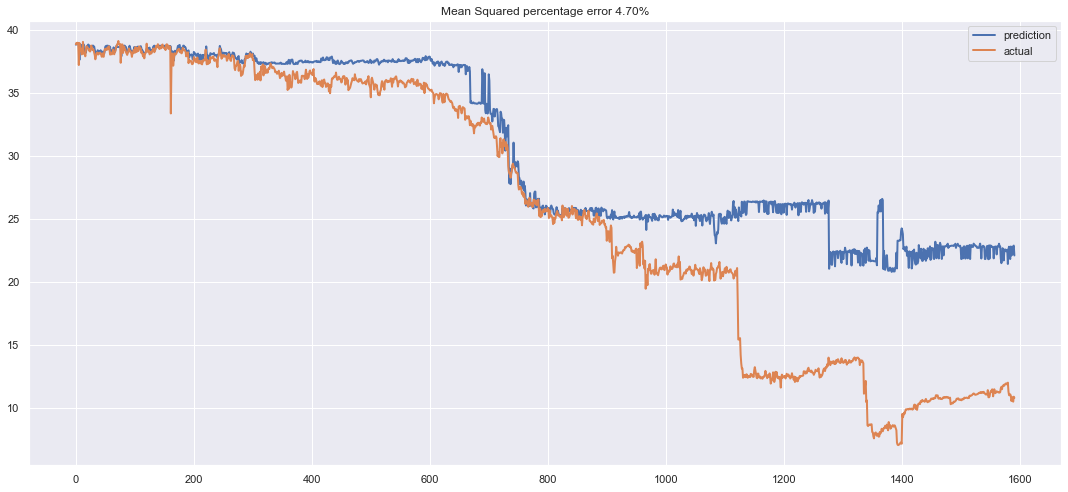

In [44]:
plot_model_results1(X,y, rf, rf_params)

# XGBOOST

In [45]:
#Extreme Gradient Boosting
xgb = XGBRegressor(n_estimators=100, gamma=200, eta=0.1, subsample=1, objective='reg:squarederror', 
                       random_state=8)

xgb_params = {'n_estimators': range(70, 140, 10),
              'subsample': [0.5, 0.75, 1],
              'eta': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
              'gamma': range(150, 310, 10)}

Fitting 3 folds for each of 2016 candidates, totalling 6048 fits
The mean squared error is: 14.853714926057519
The R 2 is: 0.774752307598359
The mean absolute error is: 2.559519590163111
The root_mean square error is: 3.8540517544601705


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None, gamma=200,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=8,
             reg_alpha=None, ...)

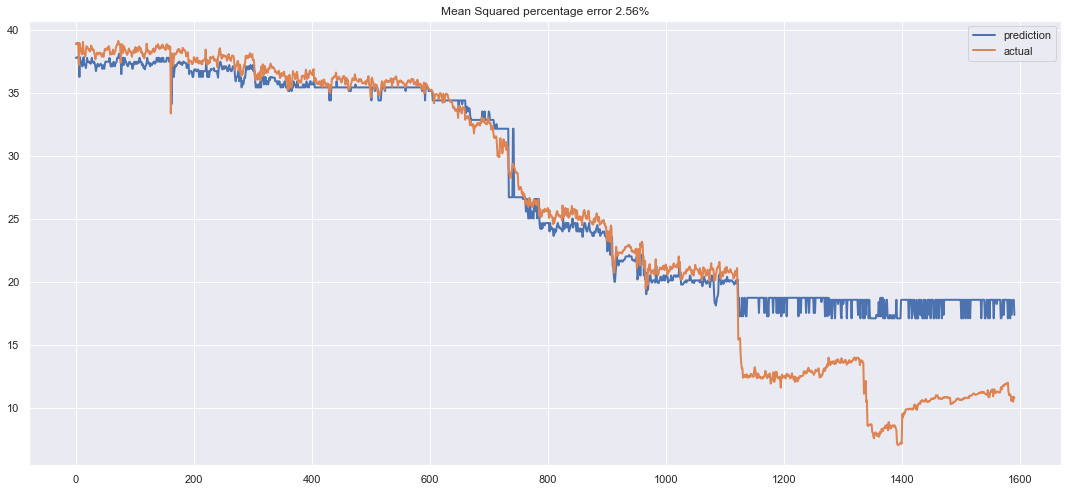

In [46]:
plot_model_results1(X,y, xgb, xgb_params)

# Lasso regression

In [47]:
# Lasso Regression
lasso = Lasso(fit_intercept=1, alpha=0.05, max_iter=10000, random_state=8)

las_params = {'fit_intercept': [1, 0],
              'alpha': [0.005, 0.01, 0.03, 0.05, 0.07, 0.1]}

Fitting 3 folds for each of 12 candidates, totalling 36 fits
The mean squared error is: 0.15070679172990836
The R 2 is: 0.9987073047681446
The mean absolute error is: 0.22844409944762195
The root_mean square error is: 0.3882097264751469


Lasso(alpha=0.05, fit_intercept=1, max_iter=10000, random_state=8)

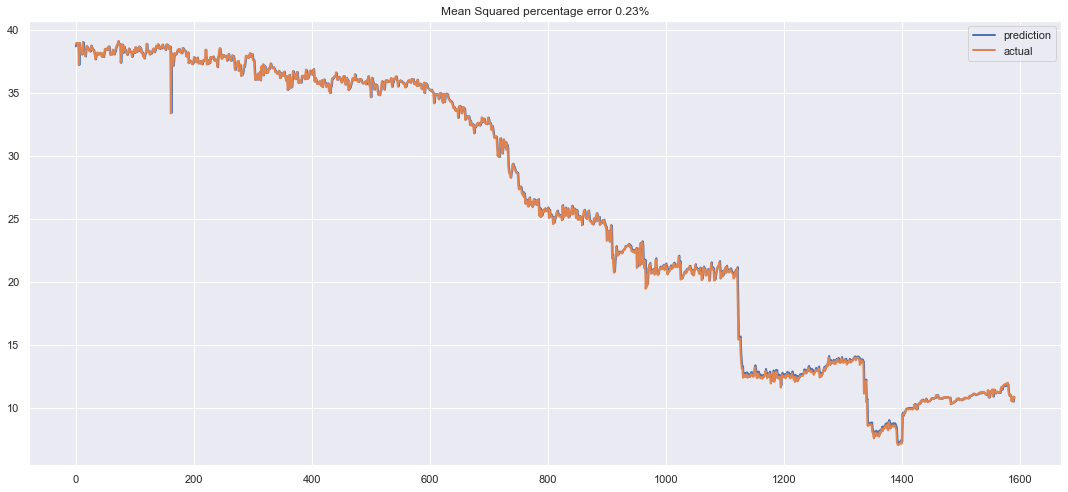

In [48]:
plot_model_results1(X,y, lasso, las_params)

# RNN/ LSTM


In [47]:
#importing required libraries
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [48]:
# converting series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
# this is input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# this is forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = concat(cols, axis=1)
    agg.columns = names
# here we are droping the rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [49]:
# converting the date into index, and drop values
oil = pd.read_csv('petroleumflowdata.csv')
oil['Date'] = pd.to_datetime(oil['Date'],format='%d/%m/%Y')
oil.set_index('Date',inplace=True)
oil.drop(['CGR', 'WGR'], axis=1, inplace=True)

In [50]:
# information of oil
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5307 entries, 2004-05-22 to NaT
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cum. flow      5307 non-null   float64
 1   Condensate     5307 non-null   float64
 2   Water          5307 non-null   float64
 3   Avg. Pressure  5307 non-null   float64
 4   Total flow     5307 non-null   float64
dtypes: float64(5)
memory usage: 248.8 KB


In [51]:
values1 = oil.values
values2 = values1.astype('float32')
# normalize features 
scaler = MinMaxScaler(feature_range=(0,1))


# the number of lags 
reframed = series_to_supervised(values2, 1, 1)

scaled = scaler.fit_transform(reframed)
# here we splitting the test train
n_train = int(oil.shape[0]*0.70)
values = scaled
train = values[:n_train, :]
test = values[n_train:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# Reshape
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(3714, 1, 9) (3714,) (1592, 1, 9) (1592,)


In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Epoch 1/50
52/52 - 4s - loss: 0.3072 - val_loss: 0.2232 - 4s/epoch - 85ms/step
Epoch 2/50
52/52 - 0s - loss: 0.2389 - val_loss: 0.2053 - 234ms/epoch - 4ms/step
Epoch 3/50
52/52 - 0s - loss: 0.2075 - val_loss: 0.1785 - 234ms/epoch - 4ms/step
Epoch 4/50
52/52 - 0s - loss: 0.1879 - val_loss: 0.1652 - 236ms/epoch - 5ms/step
Epoch 5/50
52/52 - 0s - loss: 0.1689 - val_loss: 0.1630 - 241ms/epoch - 5ms/step
Epoch 6/50
52/52 - 0s - loss: 0.1472 - val_loss: 0.1679 - 248ms/epoch - 5ms/step
Epoch 7/50
52/52 - 0s - loss: 0.1191 - val_loss: 0.1719 - 241ms/epoch - 5ms/step
Epoch 8/50
52/52 - 0s - loss: 0.0988 - val_loss: 0.1817 - 252ms/epoch - 5ms/step
Epoch 9/50
52/52 - 0s - loss: 0.0917 - val_loss: 0.1710 - 281ms/epoch - 5ms/step
Epoch 10/50
52/52 - 0s - loss: 0.0828 - val_loss: 0.1505 - 255ms/epoch - 5ms/step
Epoch 11/50
52/52 - 0s - loss: 0.0724 - val_loss: 0.0964 - 246ms/epoch - 5ms/step
Epoch 12/50
52/52 - 0s - loss: 0.0576 - val_loss: 0.0493 - 316ms/epoch - 6ms/step
Epoch 13/50
52/52 - 0s - lo

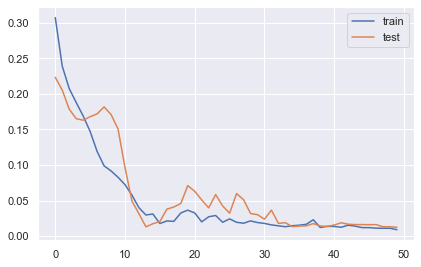

In [53]:
# design network
model_1 = Sequential()
model_1.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model_1.add(Dense(1))
model_1.compile(loss='mae', optimizer='adam')
# fit network
history = model_1.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [65]:
yhat = model_1.predict(test_X)

In [66]:
mtx = model_1.predict(test_X)

In [67]:
test_X

array([[[0.7407368 , 0.25791857, 0.01111111, ..., 0.2522936 ,
         0.01001112, 0.38888896]],

       [[0.740983  , 0.26244345, 0.01111111, ..., 0.2522936 ,
         0.01051673, 0.38925683]],

       [[0.74122894, 0.26244345, 0.01161616, ..., 0.24311927,
         0.01051673, 0.38888896]],

       ...,

       [[0.99986327, 0.0520362 , 0.53535354, ..., 0.01834862,
         0.59146523, 0.2623253 ]],

       [[0.99993193, 0.03167421, 0.59191924, ..., 0.01834862,
         0.57933056, 0.26342905]],

       [[0.99999994, 0.03167421, 0.579798  , ..., 0.02293578,
         0.581353  , 0.2645328 ]]], dtype=float32)

In [68]:
test2 = test_X.reshape(test_X.shape[0], test_X.shape[2])

In [69]:
inversed = scaler.inverse_transform(np.hstack((test2, mtx)))

In [70]:
test_y.shape

(1592,)

In [71]:
inversed1 = scaler.inverse_transform(np.hstack((test2, test_y.reshape(test_y.shape[0], 1))))

In [72]:
y_actual = inversed1[:, -1]

In [73]:
y_pred = inversed[:, -1]

In [74]:
#RNN Recurrent Neural Networks/ LSTM Long Short Term Memory
error_MSE = mean_squared_error(y_pred, y_actual)
error_r2 = mean_absolute_error(y_pred, y_actual)
error_mae = r2_score(y_pred, y_actual)
print("The mean squared error is:", error_MSE)
print("The R 2 is:", error_r2)
print("The mean absolute error is:", error_mae)
print("The root_mean square error is:", np.sqrt(error_MSE))

The mean squared error is: 0.56275654
The R 2 is: 0.58961886
The mean absolute error is: 0.9948367875261711
The root_mean square error is: 0.750171


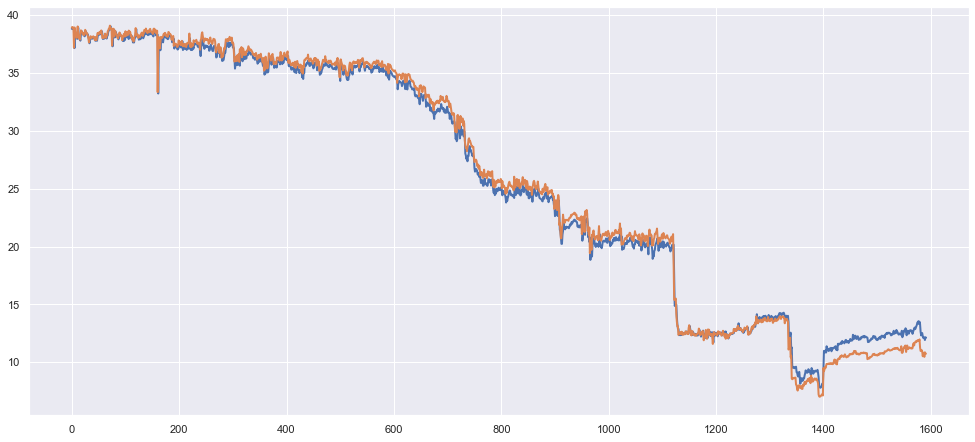

In [75]:
plt.figure(figsize=(15, 7))

x = range(yhat.size)
plt.plot(x,y_pred, label='prediction', linewidth=2.0)
plt.plot(x, y_actual, label='actual', linewidth=2.0)
plt.show()